# AXIS INSURANCE DATASET

## Description

This dataset was created with the objective to predict customer health insurance charges and seeking a new strategy to increase revenue such as setting to plan prices correctly and to minimise loss and also this shows the relationship between smoking and its effect of insurance.

## Importing Librairies

Here are the libraries utilised and needed for this notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols # For n-way ANOVA
from scipy.stats import chi2_contingency # For Chi-sq
import warnings
warnings.filterwarnings('ignore')


In [5]:
#To load the csv file and create the data frame
axis_df=pd.read_csv("AxisInsurance.csv")

In [14]:
# copying the data to another variable to aviod changes to the original data
data=axis_df.copy()

#therefore this means that "data" is the copy of the dataset which is the original one

## Exploratory Data Analysis (EDA)

This is used to have a general understanding of the original dataset, such as how many rows or columns are there, the datatypes and whether there are null values or missing values.

In [6]:
# to display the data frame of this dataset
axis_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## As we can see in the dataset, we have the following variables:

### Predictors:

- age: that describe how old the beneficiary is.
- sex: insurance contractor gender:male,female.
- bmi, body mass index. Numeric variable that measures it the contractor suffers from over/underweight.
- children, number of children covered by the insurance policy.
- region: beneficiary's residential area.
- Predicted variable:
- charges: medical cost billed to beneficiary.



## Viewing the first and last 5 rows of the dataset

In [7]:
#this will show the first 5 rows
axis_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
#this will display the last 5 rows of the dataset
axis_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## This will show how many rows and columns are present in the data frame

In [10]:
print("The data frame has {} rows and {} columns".format(axis_df.shape[0],axis_df.shape[1]))

The data frame has 1338 rows and 7 columns


## Showing the data type of each column in the data frame

In [11]:
axis_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### From this analysis, it can be deduced that age, bmi, children, charges colums are a numeric datatype while sex , smoker, region are colums that have object datatype

In [12]:
# this is to display the information of the data frame
axis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Understand the shape of the dataset

In [15]:
axis_df.shape

(1338, 7)

- This shows that the dataset has 1338 rows and 7 columns

## Check the data types for the colums for the dataset

In [16]:
axis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Check for Null values in the dataset

In [17]:
axis_df.apply(lambda x:sum(x.isnull()))

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- From above it shows that in this dataset there are no null values present

## Checking For Missing Values in the Dataset

In [123]:
axis_df.isnull().sum

<bound method DataFrame.sum of         age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]>

- There are no missing values in the dataset

## To check for the size of the data frame

In [18]:
axis_df.size

9366

## Having a statistical summary of the dataset

In [19]:
axis_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## From the previous table, we can see that:

1. The variance of the variable "children" is far smaller than the rest. It may be taken into account when tunning the baseline model.
2. Variables "age" and "bmi" has similar shape except for the mean and maximum value.
3. Age has minimum value as 18. This means that the data has information about adults. The mean is 39
4. 75% of people have 2 or less children.
5. Charges mean is higher than the median so there is possibility of it being rightly skewed. 
6. The BMI is between 15.96 and 53.13. The mean bmi is 30.66.


# Understanding the dataset

## Visualisations with Original Data

The following visualisations will use the original dataset provided which means the "object" datatypes will also be present.

# Univariate Analysis

## Gender

In [22]:
# to check how many females and males are used in this dataset
axis_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

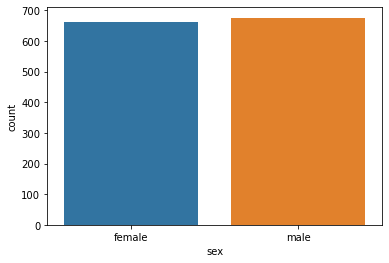

In [23]:
#graphically display the amount of female and male are in this dataset
sns.countplot(axis_df['sex'])
plt.show()

In [89]:
axis_df.sex.value_counts(normalize=True)*100

male      50.523169
female    49.476831
Name: sex, dtype: float64

The code above was used to check the percentage of data in gender. This has revealed that the percentage of male is higher than female in this dataset.

## Smoking

- This shows how many smokers are presesent in this dataset and also graphically

In [24]:
axis_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

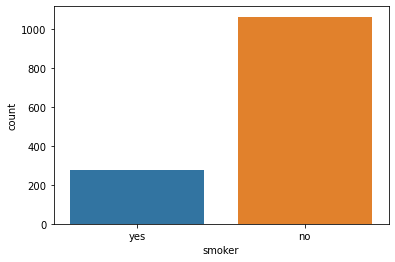

In [25]:
# graphically dislay of the above output
sns.countplot(axis_df['smoker'])
plt.show()

### Charges in relation to smoking

- This is to check the correlation and the influence of smoking on overall charges of the individuals in the dataset

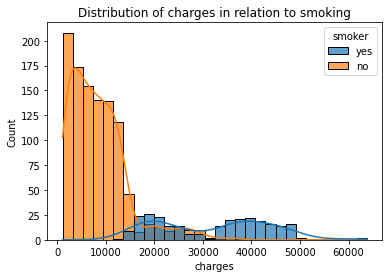

In [83]:
sns.histplot(axis_df, x='charges', hue='smoker', kde=True, alpha=.7)
plt.title('Distribution of charges in relation to smoking')
plt.show()

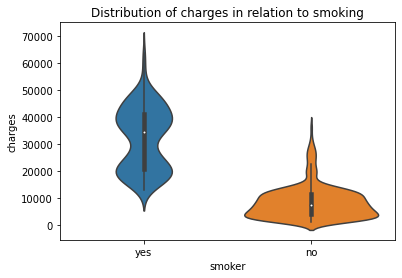

In [85]:
sns.violinplot(data=axis_df, y='charges', x='smoker')
plt.title('Distribution of charges in relation to smoking')
plt.show()

Observation: From the dataset is quite unequal when it comes to the 'smoker' column. However, it displays that generally smokers will incur more charges than non-smokers

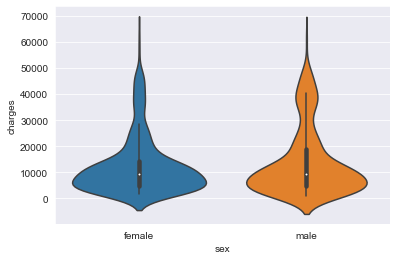

In [124]:
# a violin plot which will show the distribution of charges by different sex

sns.violinplot(data=axis_df, x='sex', y='charges')
plt.show()

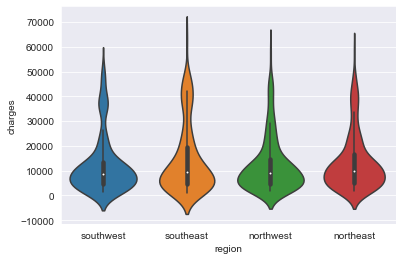

In [125]:
# a violin plot which will show the distribution of charges by different locations

sns.violinplot(data=axis_df, x='region', y='charges')
plt.show()

## Children

This is to show if the sample size have children and how many children they have

In [26]:
# This is to display the minimum and max number of children a person has in this dataset
axis_df['children'].unique()

array([0, 1, 3, 2, 5, 4])

From the above analysis it can be deduced that in this dataset the minimum amount of children a person can have is 0 while the maximum is 5.

In [27]:
# this is the count of children belonging to either of the groups begining from 0-5
axis_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### This is the graphical illustration of the count of children 

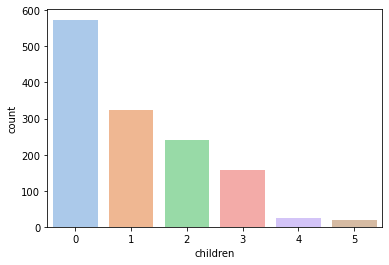

In [51]:
sns.countplot(axis_df['children'],palette='pastel')
plt.show()

It can be deduced that less than 100 people in this dataset have up to 4 or 5 children. While the majority of the dataset have 0 children.

# Regions

Displaying the unique regions used in this dataset

In [30]:
# display the types of regions are used in this dataset
axis_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [32]:
# the count of each region
axis_df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

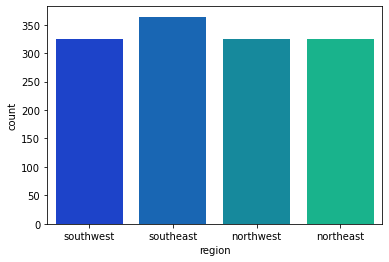

In [50]:
# the graohical illustration of the count of each region
sns.countplot(axis_df['region'],palette='winter')
plt.show()

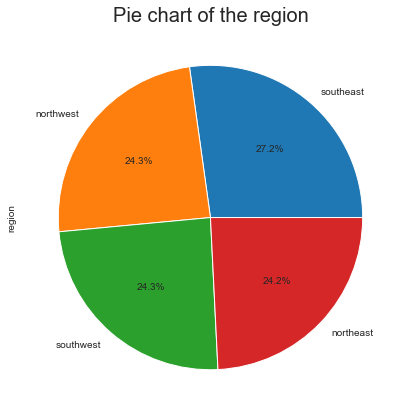

In [91]:
plt.figure(figsize=(9,7))
axis_df.region.value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of the region', {'fontsize':20})
plt.show()

- Observation: the highest number used in this dataset was from the southeast region.

### Charges

In [ ]:
sns.set_style('darkgrid')

# Crosstab

In [34]:
# Display the count of people with children and if they are smoker or not
pd.crosstab(axis_df['children'],axis_df['smoker'])

smoker,no,yes
children,,
0,459,115
1,263,61
2,185,55
3,118,39
4,22,3
5,17,1


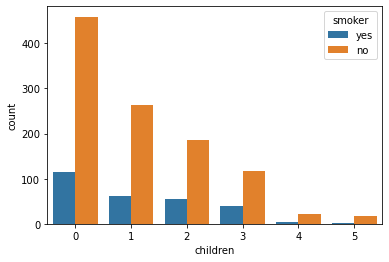

In [35]:
# Graph of the crosstab for the above analysis
sns.countplot(axis_df['children'],hue=axis_df['smoker'])
plt.show()

## Observation

- From the above graph is displays that 459 non smoking people have 0 children while 115 smokers have 0 children.
- 263 non smokers have the total of 1 child and 61 smokers have a total of 1 child.
- 17 nonsmokers have an amount of 5 children.
- While 1 smoking person has a total of 5 children in the dataset.

## Having a statistical summary of the dataset

In [36]:
axis_df.describe()
# this is a description of the 5 point summary if data frame

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Accordingly, the dataset relatively distributed well across various categories, therefore, there is no need for changes or modification regarding the dataset.

## Distribution of Numerical Columns

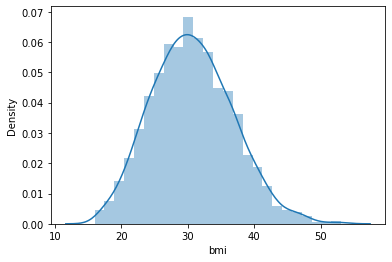

In [37]:
#graphical display of the distribution of bmi column
sns.distplot(axis_df['bmi'])
plt.show()

## Observation
- The graph displayed above shows that the bmi could be normally distributed

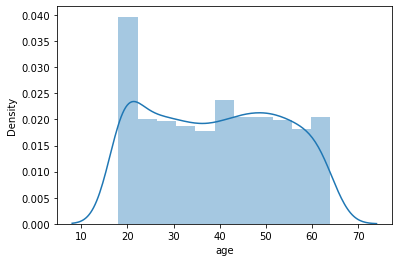

In [38]:
#graphical display of the distribution of the age column 
sns.distplot(axis_df['age'])
plt.show()

## Observation
- From the graph above it displays that the age column is also normally distributed
- You can also say that the age distribution is not really normal because from this display there are too many people of the age 20.

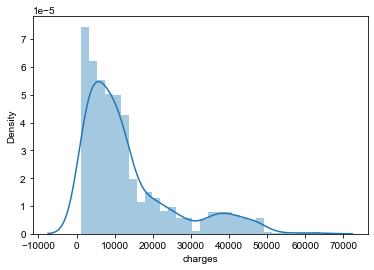

In [90]:
#graphical display of the distribution of the charges column 
sns.distplot(axis_df['charges'])
sns.set_style('darkgrid')
plt.show()

## Observation 
- The graph shows that the charges are rightly skewed when the long tail is at the right side which explains that the mean is greater than the median (mean>median).
- Also the medical charges are more under the range from 0-15000

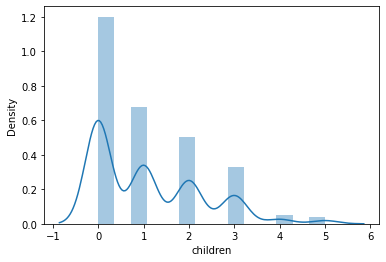

In [40]:
# graph display the distribution of the children column
sns.distplot(axis_df['children'])
plt.show()

## Observation 
- This also reveals that the graph is rightly skewed as long as the long tail is at the right side.

## BMI, Charges and Smoking

This will display the distribution of the BMI in the dataset

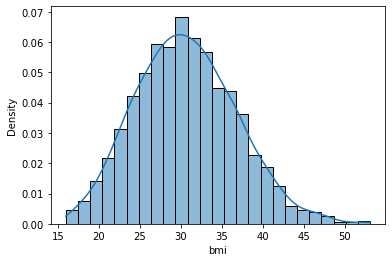

In [86]:
sns.histplot(data=axis_df, x='bmi', stat='density', kde=True)
plt.show()

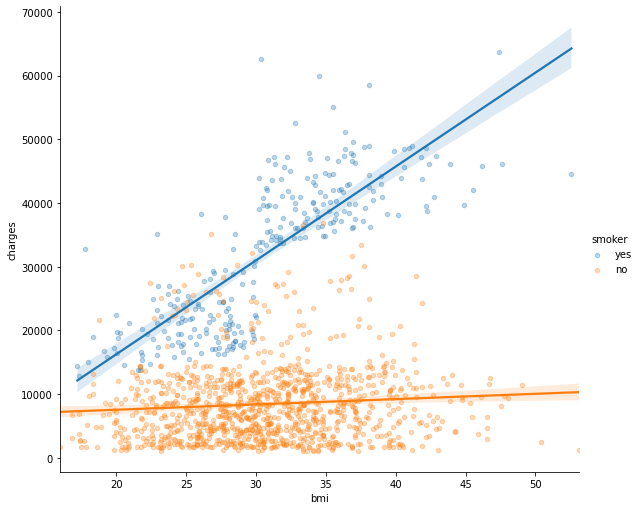

In [87]:
sns.lmplot(data=axis_df, x='bmi', y='charges', hue='smoker', scatter_kws={"alpha": .3, "s": 20}, height=7, aspect=1.15)
plt.show()

Observation: From the above graphs it shows that the individuals who are smokers their charges icrease alongside the BMI

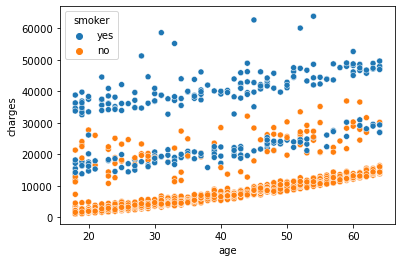

In [88]:
sns.scatterplot(data=axis_df, x='age', y='charges', hue='smoker')
plt.show()

Usually it is supposed to be the older you are, the higher the charges are, however, from this scatter plot it reveals that may not always be the case and an instance could be given according the level of social class or poverty level.

# Skewness

This is to display the skewness of each column and reveal which skewness is high and which is less.

In [42]:
#this will show the skewness of each column
pd.DataFrame([stats.skew(axis_df['age']),stats.skew(axis_df['bmi']),stats.skew(axis_df['charges'])],index=['age','bmi','charges'],columns=['skewness'])

,skewness
age,0.055610
bmi,0.283729
charges,1.514180


## Observation
- This analysis reveals that the column with the highest skewness is "Charges" while "Age" had lesser skewness.

# Checking For Outliers

### Age

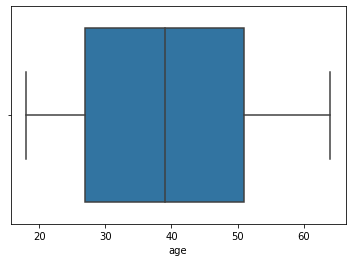

In [43]:
#checking for outliers in 'age' column
sns.boxplot(x='age',data=axis_df)
plt.show()

Observation: from the boxplot above it shows there are no outliers in the 'Age' column

### Charges

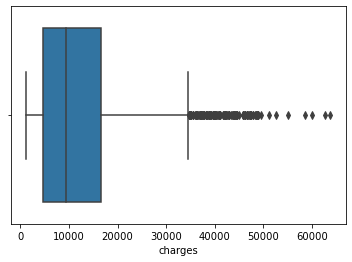

In [44]:
#using the boxplot to check if there are any outliers in the cahrges column
sns.boxplot(x='charges',data=axis_df)
plt.show()

Observation: from the above graph it is evident that there are outliers in the 'charges' column

### Bmi

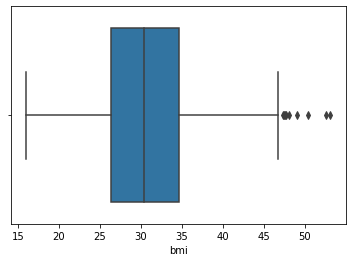

In [45]:
# check for any outliers in the bmi column
sns.boxplot(x='bmi',data=axis_df)
plt.show()

## Observation:

- The dataset can have outliers which could be further analysed.
- Neither "sex" nor "region" habe very significant effect on "charges"

### Children

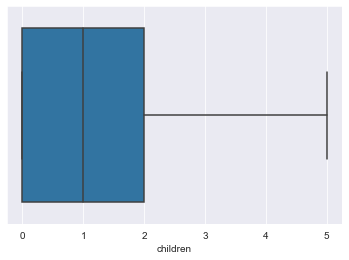

In [130]:
sns.boxplot(x='children',data=axis_df)
plt.show()

# Checking for Outliers using Z score method

In [92]:
def outlier_zscore(axis_df):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3.5
    mean = np.mean(axis_df)
    std = np.std(axis_df)
    for i in axis_df:
        z_score= (i-mean)/std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    print(outliers)
    return len(outliers), outliers

### Checking if there are any outliers in the Age column

In [94]:
age_no_of_out, age_outliers =outlier_zscore(df.age)

[]


Observation: From the above code it shows there are no outliers in the age column.

### Checking for outliers in the BMI 

In [95]:
bmi_no_of_out, bmi_outliers =outlier_zscore(df.bmi)

[]


In [96]:
df[df.bmi.isin(bmi_outliers)]

,age,sex,bmi,children,smoker,region,charges


In [99]:
df.charges.describe()

count      566.000000
mean     12405.058539
std      11358.829450
min       1607.510100
25%       4371.572437
50%       9041.613500
75%      14399.313138
max      63770.428010
Name: charges, dtype: float64

## Generating bins for Age to visualise

In [100]:
df['AGE_BIN']=pd.qcut(df.age,q=[0,.2,.4,.6,.8,1])

In [101]:
df.AGE_BIN.value_counts(sort=True)

(17.999, 24.0]    124
(44.0, 54.0]      115
(24.0, 34.0]      112
(54.0, 64.0]      109
(34.0, 44.0]      106
Name: AGE_BIN, dtype: int64

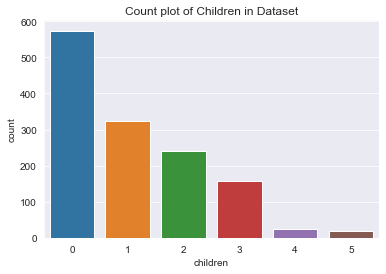

In [126]:
#creating a countplot of the children in the dataset

sns.countplot(axis_df.children)
plt.title('Count plot of Children in Dataset')
plt.show()

This visualisation reveals that most people in this dataset had no children.

# Bivariate Analysis

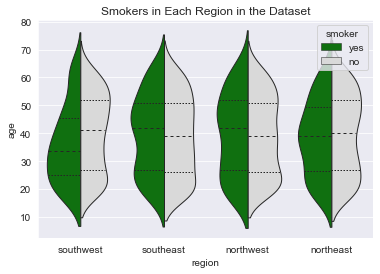

In [108]:
sns.violinplot(data=axis_df, y=axis_df.age, x=axis_df.region, hue=axis_df.smoker, split=True, inner="quart", linewidth=1,
                              palette={"yes": "g", "no": ".85"})
plt.title('Smokers in Each Region in the Dataset')
plt.show()

Observation: this reveals that number of smokers are lower from the range 40 - 80 of age in the south west region

### BMI in relation to Charges

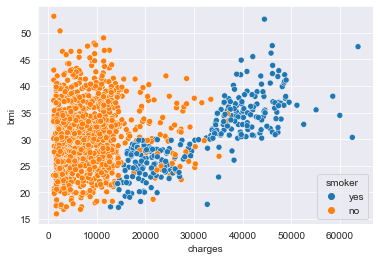

In [109]:
sns.scatterplot(data=axis_df, x=axis_df.charges, y=axis_df.bmi, hue='smoker')
plt.show()

Observation:The above graph is displaying BMI in accordance to charges and this shows that there are more non smokerz that have BMI in the range of 15-40 within the range from 0-15000 in charges, while the smokers incur more charges that move in a linear form from 15-50 BMI range.

## Charges and Smokers

<AxesSubplot:xlabel='smoker', ylabel='charges'>

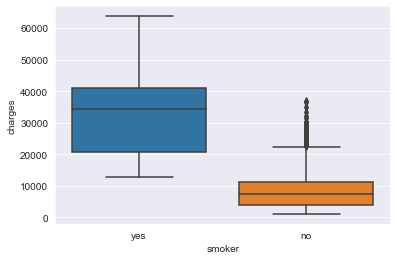

In [115]:
sns.boxplot(x=axis_df['smoker'], y=axis_df['charges'])

#### This is where the factor is significantly affect "charges"

## Count plot for Gender in respect to Age

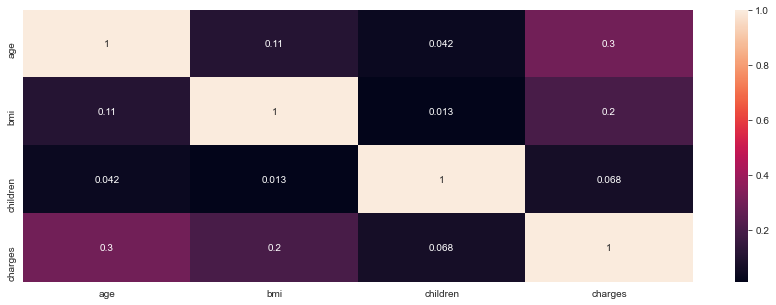

In [110]:
#heatmap that shows the correlation between numerical parameters
plt.figure(figsize=(15,5))
sns.heatmap(axis_df.corr(),annot=True)
plt.show()

- Charges is a bit correlated to age.
- Most of these columns are not postively correlated.

# Pairplot


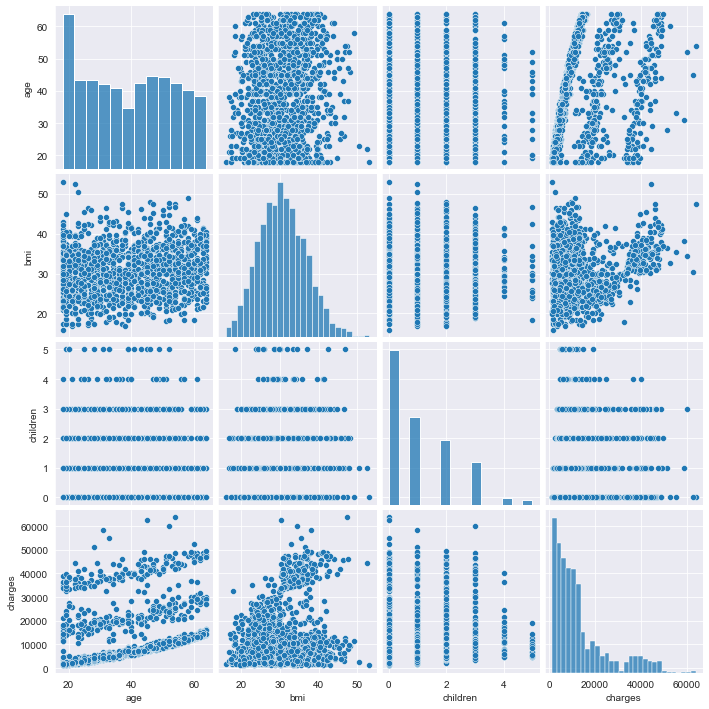

In [111]:
subset=axis_df.iloc[:,:]
sns.pairplot(subset)
plt.show()

### Observation:

- There is a slight slope in the "age" vs "bmi" slope.
- There are three "lines" with decreasing in the "age" compared to "charges" plot, which means that there might be other variables affecting the relationship between age and charges.

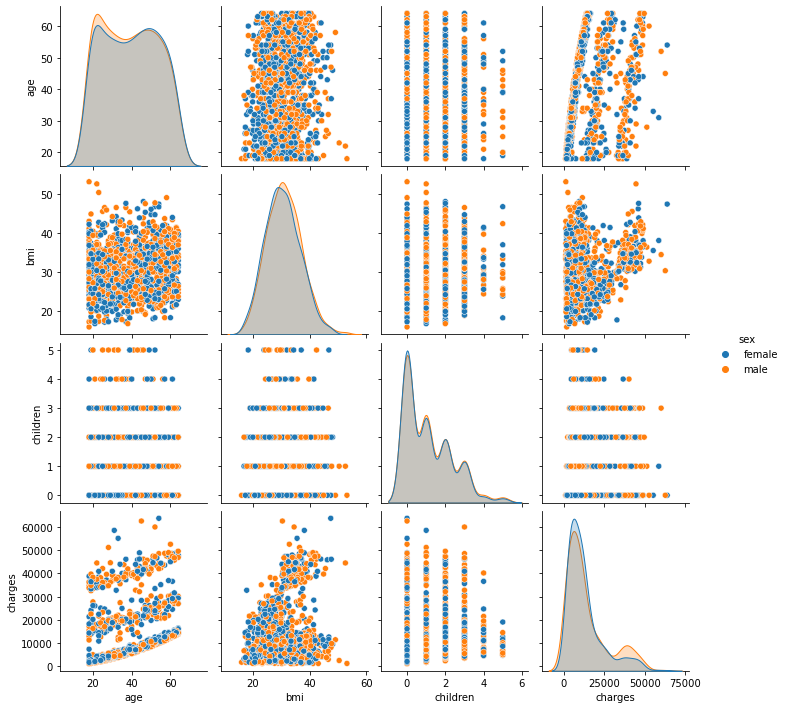

In [46]:
#a paiplot will be created in order to show the relation between the numerical features alongside the categorical feature and in this case we are seeing the relation between sex and the numerical figures such as age,bmi,charges and children
sns.pairplot(axis_df,hue='sex')
plt.show()

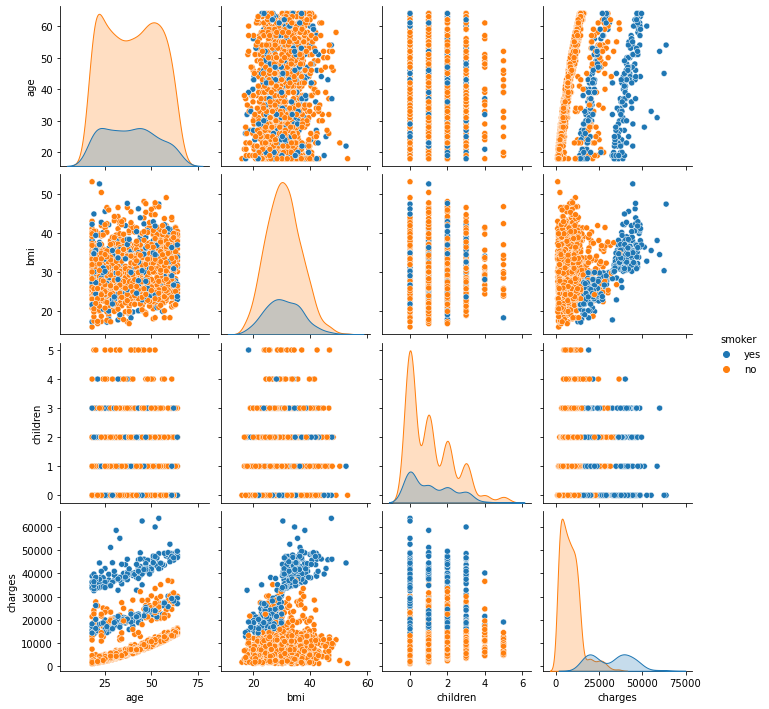

In [47]:
#this is to display the relation with smoker and the numerical feature
sns.pairplot(axis_df,hue='smoker')
plt.show()

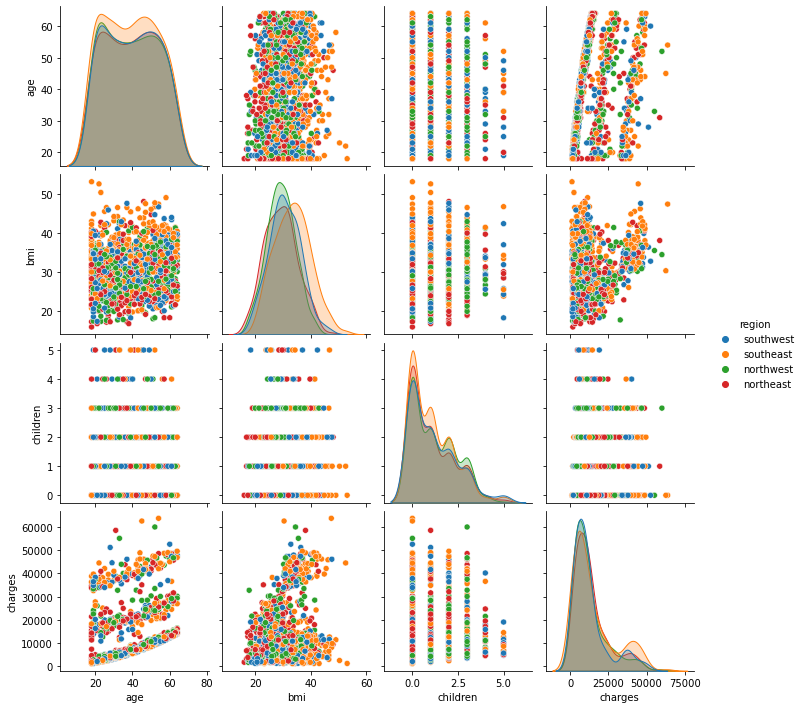

In [48]:
#display the graphical relation with region and the numerical data
sns.pairplot(axis_df,hue='region')
plt.show()

## General Observation
From the above graphs we can deduce that varying distributions in variables for different columns, hence further investigation would be carried out

# Question: Does the medical claims made by the people who smoke is greater than those who do not?

This would mean that do the charges of people who smoke have a significant difference from those who do not smoke

- Null Hypothesis -> H0 = "Charges does not have an effect on smoking"

- Altenate Hypothesis -> H1 = "Charges do have an effect on smoking"

In [62]:
# H0 = "Charges does not have an effect on smoking"
# H1 = "Charges do have an effect on smoking"
# Below is an Independent T-test carried out

x = np.array(axis_df[axis_df['smoker'] == 'yes']['charges']) #this is for selecting the charges values which corresponf to the smoker as an array
y = np.array(axis_df[axis_df['smoker'] == 'no']['charges']) # this is for selceting the charges value which corespond to the non smoker as an array
#an independent T-test will be performed 
t,p_value = stats.ttest_ind(x,y,axis =0)

if p_value <0.05:
    print("Charges does have an effect on smoking (Hence reject H0)")
else:
    print("Charges does not have an effect on smoking (Hence reject H0)")

Charges does have an effect on smoking (Hence reject H0)


# Question: Does the BMI of the females differ from that of males?

This question is posed to understand if the BMI of males have a significant difference from that of females.

- Null Hypothesis -> H0 = "BMI has no effect on gender"
- Alternate Hypothesis -> H1 = "BMI has an effect on gender"

In [64]:
# H0 = "BMI has no effect on gender"
# H1 = "BMI has an effect on gender"
# Below is also an Independent T-test performed

x = np.array(axis_df[axis_df['sex'] == 'male']['bmi']) #this will select the bmi values corresponding to male in an array
y = np.array(axis_df[axis_df['sex'] == 'female']['bmi']) #this will select the bmi values for the females as an array

#the independent T-test

t,p_value = stats.ttest_ind(x,y,axis =0)

if p_value <0.05:
    print("BMI has a signifcant effect on gender (Hence reject H0)")
else:
    print("BMI has no signifcant effect on gender (Hence reject H1)")

BMI has no signifcant effect on gender (Hence reject H1)


# Question: Is the proportion of smokers significantly different across different regions?

This is to display if there is a significant difference between proportion of smokers with regards to gender.

- Null Hypothesis -> H0 = "There is no significant difference in proportion of smokers in the different genders"
- Alternate Hypothesis -> H1 = "There is significant difference in the proportion of smokers in the different genders"

A chi square will be performed because of this will check all four types of outcome which is:
- a female and a smoker
- a female and a non smoker
- a male and a smoker
- a male and a non smoker

In [65]:
#Crosstab will be perofmed for the both categorical values
pd.crosstab(axis_df['smoker'],axis_df['sex'])

sex,female,male
smoker,,
no,547,517
yes,115,159


In [66]:
# H0 = "There is no significant difference in proportion of smokers in the different genders"
# H1 = "There is significant difference in proportion of smokers in the different genders"

# We will start with the males. This reveals that 517 are non smokers and 159 males are smokers
#From the above crosstab it reveals that 547 females are non smokers and 115 females are smokers

#E represnts the coloumn for smokers
#E20 = expected values of smokers=no and sex = female
#E21 = expected values of smokers=no and sex = male
#E30 = expected values of smokers=yes and sex = female
#E31 = expected values of smokers=yes and sex = male

#E = total of smokers or non smokers * (total of male or female / total of the genders)
#Below is a calculation of outcomes possible in this dataset

E20 = 1064*(662/1338)
print("Expected value of smokers=no and sex=female is {}".format(E20))
E21 = 1064*(676/1338)
print("Expected value of smokers=no and sex=male is {}".format(E21))
E30 = 274*(662/1338)
print("Expected value of smokers=yes and sex=female is {}".format(E30))
E31 = 274*(676/1338)
print("Expected value of smokers=yes and sex=male is {}".format(E31))



Expected value of smokers=no and sex=female is 526.4334828101644
Expected value of smokers=no and sex=male is 537.5665171898356
Expected value of smokers=yes and sex=female is 135.56651718983557
Expected value of smokers=yes and sex=male is 138.43348281016443


In [69]:
#chi-square will now be perfomed 
# the formula that will used is : summation((observed outcome - expected outcome)^2/expected outcome)

chiE20 = np.square(547-E20)/E20
print("chiE20 is {}".format(chiE20))
chiE21 = np.square(517-E21)/E21
print("chiE21 is {}".format(chiE21))
chiE30 = np.square(115-E30)/E30
print("chiE30 is {}".format(chiE30))
chiE31 = np.square(159-E31)/E31
print("chiE31 is {}".format(chiE31))

chisquare = chiE20+chiE21+chiE30+chiE31
print("chi-square is {}".format(chisquare))

# a degree of freedon will be calculated to find the number of  maximum number of logically independent values, which are values that have the freedom to vary in the dataset

degree_of_freedom = (2-1)*(2-1)
print("degree of freedom is {}".format(degree_of_freedom))

chiE20 is 0.8034854224352866
chiE21 is 0.7868451917931356
chiE30 is 3.120103976172045
chiE31 is 3.0554864382039844
chi-square is 7.765921028604452
degree of freedom is 1


In [70]:
# After calculating the chi-square value and the degree of freedom, the focus will now be on the chi square
#the table will be created and used to check if the chi-square statistics of 7.76 surpasses the critical value of the chi-square distibution, where the significant value is 0.05 (which is 95% of the cofidence level) which is 3.84
#it is obvious that it more than 3.84 therefore we have to reject the null hypothesis which is H0

if chisquare<3.84:
    print("There is no significant difference in proportion of smokers in the different genders(Hence accept H0)")
else:
    print("There is significant difference in proportion of smokers in the different genders(Hence reject H0)")

There is significant difference in proportion of smokers in the different genders(Hence reject H0)


# Question: Is the mean BMI of women with no children, one child and two children the same?

- Null Hypothesis -> H0 = The mean of bmi of women with no children, one child and two children is not the same
- Alternate Hypothesis -> H1 = The mean of bmi of women with  no children, one child and two children is the same

In [71]:
#H0 = The mean of bmi of women with no children, one child and two children is not the same
#H1 = The mean of bmi of women with  no children, one child and two children is the same

# this means we have to make the data frame of females having children <=2

df = axis_df[(axis_df['children']<=2) & (axis_df['sex']=='female')]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


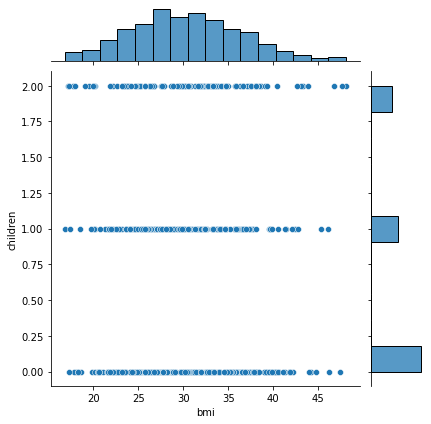

In [73]:
#to present this answer with statistical evidence a joint plot graph will be created between BMI and Children
#where jp means jointplot

jp = sns.jointplot(df['bmi'],df['children'])
plt.show()

Since the above diagram is not completely clear and does not exactly display the p_value which would show the mean of the bmi of women with no children, one child and two children the same to either reject or accept the Null Hypothesis


#### Since I could not find a clear solution with the above analysis, we can choose another test. Since we are using one independent variable "bmi", this means we can use one-way anova to do the this statistical test for improved results.

In [119]:
df.head()

,age,sex,bmi,children,smoker,region,charges,AGE_BIN
0,19,female,27.90,0,yes,southwest,16884.92400,"(17.999, 24.0]"
5,31,female,25.74,0,no,southeast,3756.62160,"(24.0, 34.0]"
6,46,female,33.44,1,no,southeast,8240.58960,"(44.0, 54.0]"
9,60,female,25.84,0,no,northwest,28923.13692,"(54.0, 64.0]"
11,62,female,26.29,0,yes,southeast,27808.72510,"(54.0, 64.0]"


In [120]:
zero_children=df[df['children']==0]['bmi']
one_children=df[df['children']==1]['bmi']
two_children=df[df['children']==2]['bmi']

In [121]:
f_stats,p_value=stats.f_oneway(zero_children,one_children,two_children)
print('F_stats:',f_stats)
print('p_value:',p_value)

F_stats: 0.3344720147757968
p_value: 0.7158579926754841


In [122]:
if p_value < 0.05: #this is making the significance level at 5%
    print('Reject H0, this means the number of children affect the mean of the BMI')
else:
    print('The number of children does not affect the mean of the BMI,(Hence,Fail to reject H0)')

The number of children does not affect the mean of the BMI,(Hence,Fail to reject H0)


# Conclusion

- From EDA and Feature importance plots we observed that Charges are morely dependent On Smoking,Body Mass Index,Age,Children
- The people who smoke will definetly incur more medical charges
- People who have high BMI will also face high medical Charges
- The number of children a person has will also have an impact on medical charges
- The higher ther age, the higher the medical charge
- The amount of children a person has does not affect a persons BMI
